In [35]:
import numpy as np
import scipy.constants as cts
import pandas as pd
import matplotlib.pyplot as plt

# Import the baking data


In [36]:
file_path = 'data/Bakelog_Sept_2024.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)
df


,day,time,elapsed (hrs),time_full,turbo pressure (picobar),ion pump pressure (nTorr),t1 (H3/H6),t2 (H7),t3 (H3),t4** (H3/H7/H4),...,H6(V),H7,H8,H9,H10,H11,H12,H13(%),H14(V),note
0,8/30,17:00,##############################################...,8/30/2024 17:00,40.0,NaN,22.4,22.4,22.3,22.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,9/2,10:40,0:00,9/2/2024 10:40,30.0,NaN,22.1,22.1,22.2,22.3,...,0.5,4.0,4.0,4.0,3.0,3.0,3.0,2.0,0.5,NaN
2,NaN,10:55,0:15,9/2/2024 10:55,30.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,1.0,NaN,1.0,NaN,NaN
3,NaN,11:15,0:35,9/2/2024 11:15,30.0,NaN,22.2,22.7,22.2,22.2,...,1.0,8.0,8.0,8.0,1.0,2.0,3.0,1.0,1.0,NaN
4,NaN,11:45,1:05,9/2/2024 11:45,30.0,NaN,22.4,24.0,22.8,22.4,...,2.0,12.0,10.0,10.0,1.0,1.5,2.0,1.0,1.2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
time_col = 'time_full'

# format time column to be a datetime
df['datetime'] = pd.to_datetime(df[time_col], format='%m/%d/%Y %H:%M')

df = df.sort_values(by='datetime')

print(df)

      day   time                                      elapsed (hrs)  \
0    8/30  17:00  ##############################################...   
1     9/2  10:40                                               0:00   
2     NaN  10:55                                               0:15   
3     NaN  11:15                                               0:35   
4     NaN  11:45                                               1:05   
..    ...    ...                                                ...   
993   NaN    NaN                                                NaN   
994   NaN    NaN                                                NaN   
995   NaN    NaN                                                NaN   
996   NaN    NaN                                                NaN   
997   NaN    NaN                                                NaN   

           time_full  turbo pressure (picobar)  ion pump pressure (nTorr)  \
0    8/30/2024 17:00                      40.0                        

In [38]:

# read in the relevant data sets
ion_pump_pressure_col = 'ion pump pressure (nTorr)'
turbo_pump_pressure_col = 'turbo pressure (picobar)'

# read in temperature readings
t1 = 't1 (H3/H6)'
t2 = 't2 (H7)'
t3 = 't3 (H3)'
t4 = 't4** (H3/H7/H4)'
t4b = 't4b (H3/H7/H4)'
t5 = 't5 (H3/H7)'
t6 = 't6 (H3/H7/H4)'
t8 = 't8 (DPT)'
t9 = 't9 (H9)'
t10 = 't10 (H8)'
t11 = 't11 (H13)'
t12 = 't12 (H10)'
t13 = 't13 (H11)'
t14 = 't14 (H12)'
t15 = 't15 (H14)'
t17 = 't17 H1(near)'
t17b = 't17b (H1(mid))'
t18 = 't18 (H1(far))'
t19 = 't19 (H4)'
t20 = 't20 (H2)'
t21 = 't21 (H7/H8)'
t22 = 't22 (H4/H5)'
t23 = 't23 (H4/H3(mount))'
t24 = 't24 (H2)'
t25 = 't25 (H5)'
t26 = 't26 (H4/H5)'
t27 = 't27 (H2/H3)'
t28 = 't28 (H1/H2)'
t30 = 't30 (H6)'

In [39]:
#filtered_df = df
ion_filtered_df = df.dropna(subset=[ion_pump_pressure_col])# Select the rows starting from the first valid index

# filtered_df = df.loc[first_valid_index:]
ion_filtered_df = ion_filtered_df[[time_col, ion_pump_pressure_col]]  # Select only the 'time' and 'ion pump pressure' columns

ion_filtered_df 

,time_full,ion pump pressure (nTorr)
60,9/7/2024 12:40,21.0
61,9/7/2024 15:50,19.0
62,9/8/2024 9:15,17.0
63,9/8/2024 13:35,14.0
64,9/9/2024 8:30,11.0
65,9/9/2024 14:20,11.0
66,9/9/2024 18:20,10.0
67,9/10/2024 12:50,8.8
68,9/10/2024 16:45,8.4
69,9/11/2024 8:40,7.3


# Input start time of plotting

In [45]:
time_col = 'datetime'
# Define the start time point
start_time = pd.to_datetime('2024-09-02 17:00', format='%Y-%m-%d %H:%M')

# Filter the DataFrame
df = df[df['datetime'] >= start_time]
print(df)

     day   time                                      elapsed (hrs)  \
13   NaN  17:30                                               6:50   
14   NaN  18:30                                               7:50   
15   9/3   9:50  ##############################################...   
16   NaN  10:25  ##############################################...   
17   NaN  10:45                                               0:05   
..   ...    ...                                                ...   
74   NaN  17:20                                                NaN   
75  9/13   8:50                                                NaN   
76   NaN  11:45                                                NaN   
77   NaN  13:45                                                NaN   
78   NaN  14:25                                                NaN   

          time_full  turbo pressure (picobar)  ion pump pressure (nTorr)  \
13   9/2/2024 17:30                      74.0                        NaN   
14   9/

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_shit(df, xcol, ycol, title, ylabel, xlabel, filename):
    sns.set(style="whitegrid")
    
    sns.lineplot(data=df, x=xcol, y=ycol, marker='o')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True)
    # Set additional x-ticks
    xticks = pd.date_range(start=df[xcol].min(), end=df[xcol].max(), freq='12H')
    plt.xticks(ticks=xticks, rotation=90)

    plt.savefig(f'{filename}.png', bbox_inches='tight')
    plt.show()
    sns.set(style="whitegrid")
    

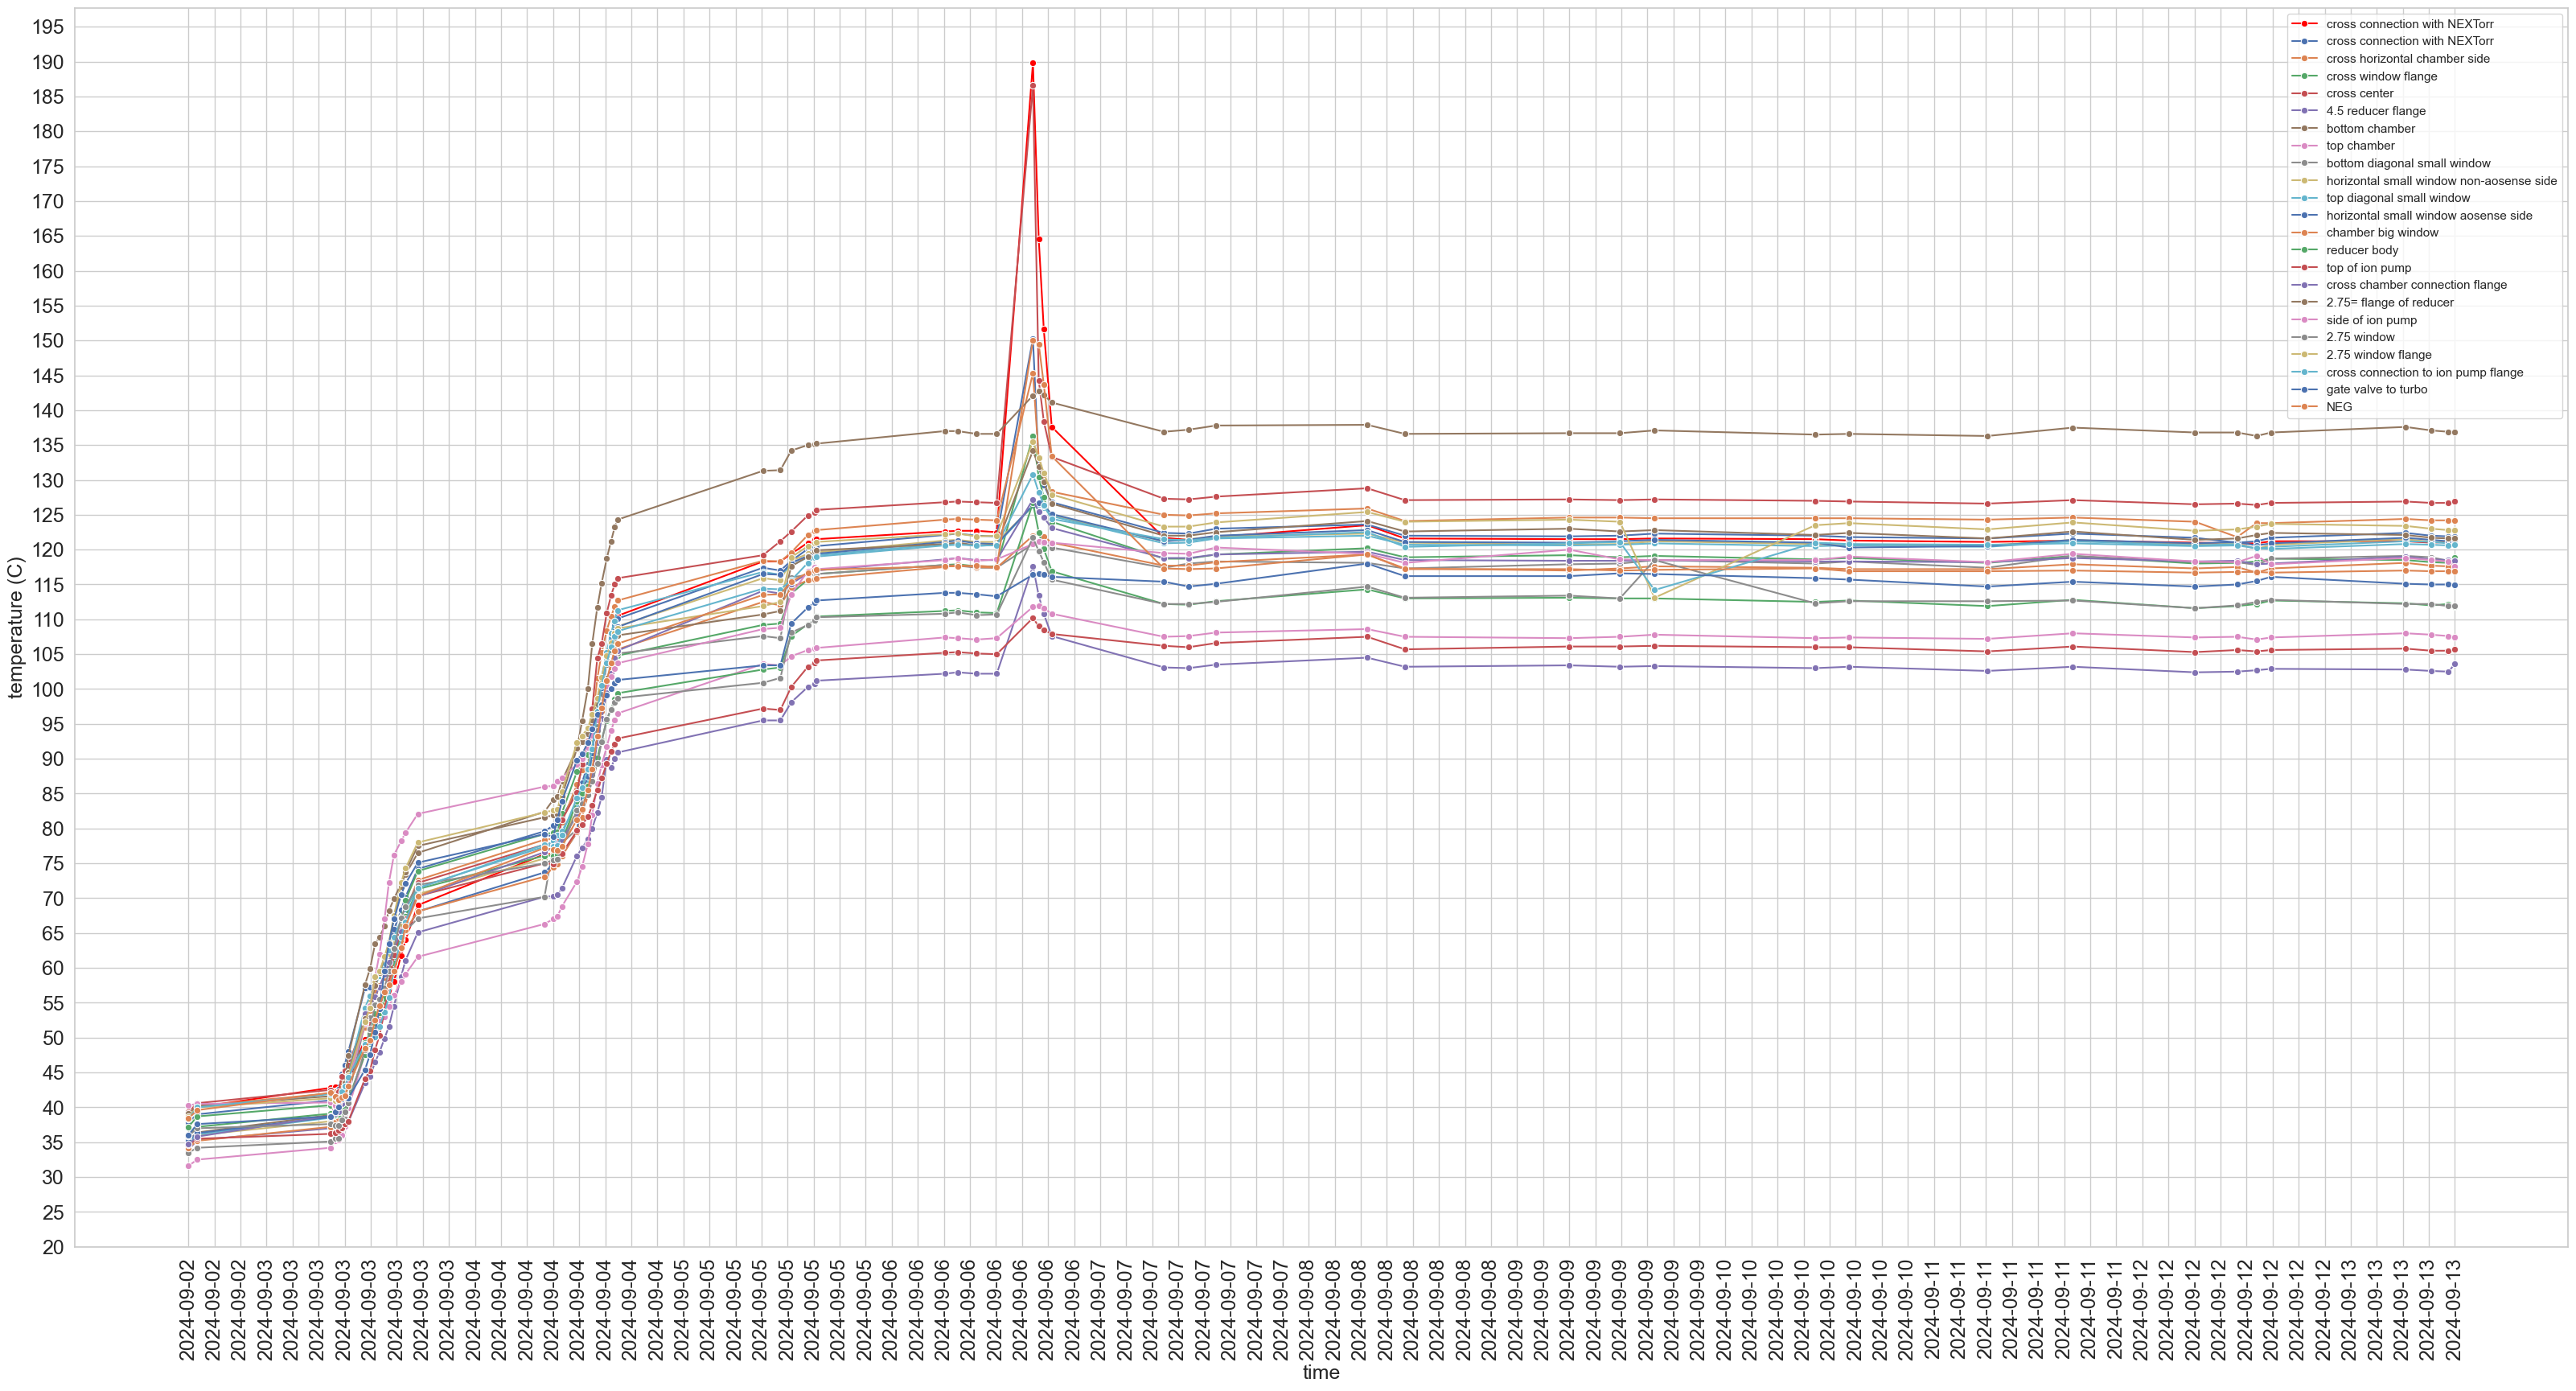

In [77]:
filename = "temps11"
sns.set(style="whitegrid")
plt.figure(figsize=(40, 20))
    
sns.lineplot(data=df, x=time_col, y=t1, marker='o',color='red', label="cross connection with NEXTorr")
sns.lineplot(data=df, x=time_col, y=t2, marker='o',label="cross connection with NEXTorr")
sns.lineplot(data=df, x=time_col, y=t3, marker='o',label="cross horizontal chamber side")
sns.lineplot(data=df, x=time_col, y=t4b, marker='o', label= "cross window flange")
sns.lineplot(data=df, x=time_col, y=t5, marker='o',label="cross center")
sns.lineplot(data=df, x=time_col, y=t6, marker='o', label="4.5 reducer flange")
#sns.lineplot(data=df, x=time_col, y=t8, marker='o',label="DPT")
sns.lineplot(data=df, x=time_col, y=t9, marker='o',label="bottom chamber")
sns.lineplot(data=df, x=time_col, y=t10, marker='o',label="top chamber")
sns.lineplot(data=df, x=time_col, y=t11, marker='o',label="bottom diagonal small window")
sns.lineplot(data=df, x=time_col, y=t12, marker='o',label="horizontal small window non-aosense side",)
sns.lineplot(data=df, x=time_col, y=t13, marker='o',label="top diagonal small window")
sns.lineplot(data=df, x=time_col, y=t14, marker='o',label="horizontal small window aosense side")
sns.lineplot(data=df, x=time_col, y=t15, marker='o',label="chamber big window")
#sns.lineplot(data=df, x=time_col, y=t17, marker='o')
#sns.lineplot(data=df, x=time_col, y=t17b, marker='o')
#sns.lineplot(data=df, x=time_col, y=t18, marker='o')
sns.lineplot(data=df, x=time_col, y=t19, marker='o',label="reducer body")
sns.lineplot(data=df, x=time_col, y=t20, marker='o',label="top of ion pump")
sns.lineplot(data=df, x=time_col, y=t21, marker='o',label = "cross chamber connection flange")
sns.lineplot(data=df, x=time_col, y=t22, marker='o',label="2.75= flange of reducer")
#sns.lineplot(data=df, x=time_col, y=t23, marker='o')
sns.lineplot(data=df, x=time_col, y=t24, marker='o',label="side of ion pump")
sns.lineplot(data=df, x=time_col, y=t25, marker='o',label="2.75 window")
sns.lineplot(data=df, x=time_col, y=t26, marker='o',label="2.75 window flange")
sns.lineplot(data=df, x=time_col, y=t27, marker='o',label="cross connection to ion pump flange")
sns.lineplot(data=df, x=time_col, y=t28, marker='o',label="gate valve to turbo")
sns.lineplot(data=df, x=time_col, y=t30, marker='o',label="NEG")

plt.xlabel("time",fontsize =18)
plt.ylabel("temperature (C)",fontsize =18)

plt.grid(True)
# Set additional x-ticks

# frequency of ticks every 3 hours
xticks = pd.date_range(start=df[time_col].min(), end=df[time_col].max(), freq='3H')
plt.xticks(ticks=xticks, rotation=90,fontsize=18)
plt.yticks(ticks=np.arange(20,200,5),fontsize =18)

plt.savefig(f'{filename}.png', bbox_inches='tight')
plt.show()

sns.set(style="whitegrid")

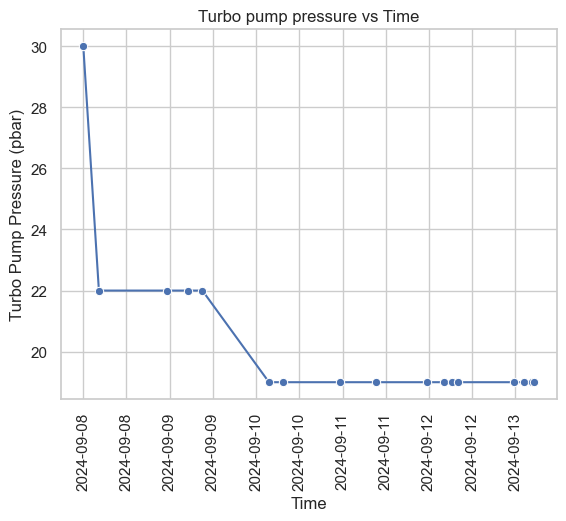

In [8]:
plot_shit(df, time_col, turbo_pump_pressure_col,'Turbo pump pressure vs Time', 'Turbo Pump Pressure (pbar)','Time', 'turbo_output')

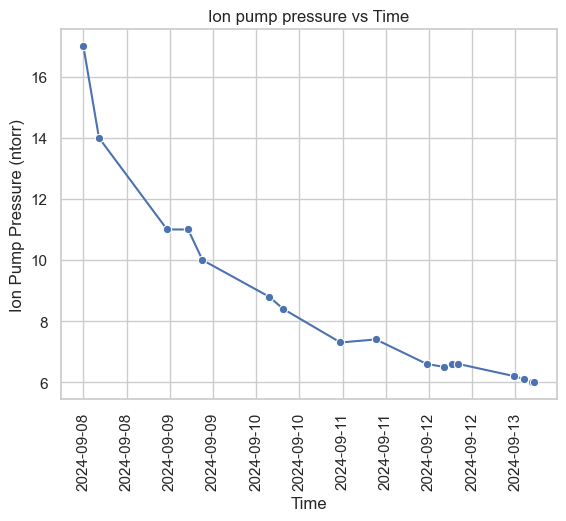

In [9]:
plot_shit(df, time_col, ion_pump_pressure_col,'Ion pump pressure vs Time', 'Ion Pump Pressure (ntorr)','Time', 'ion output')

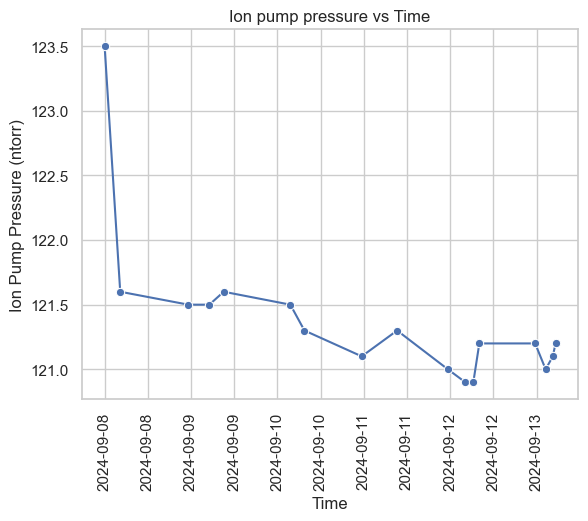

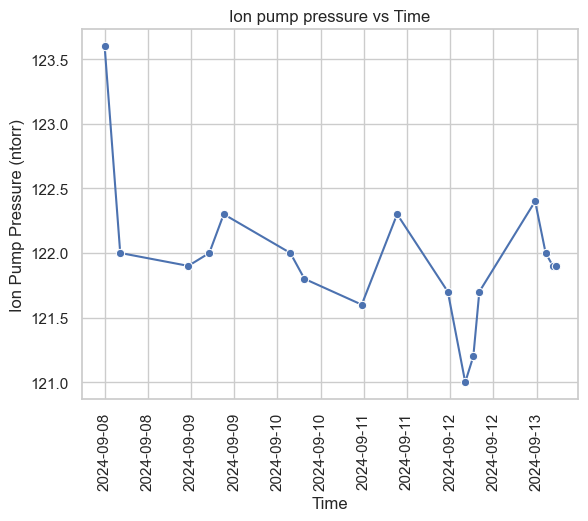

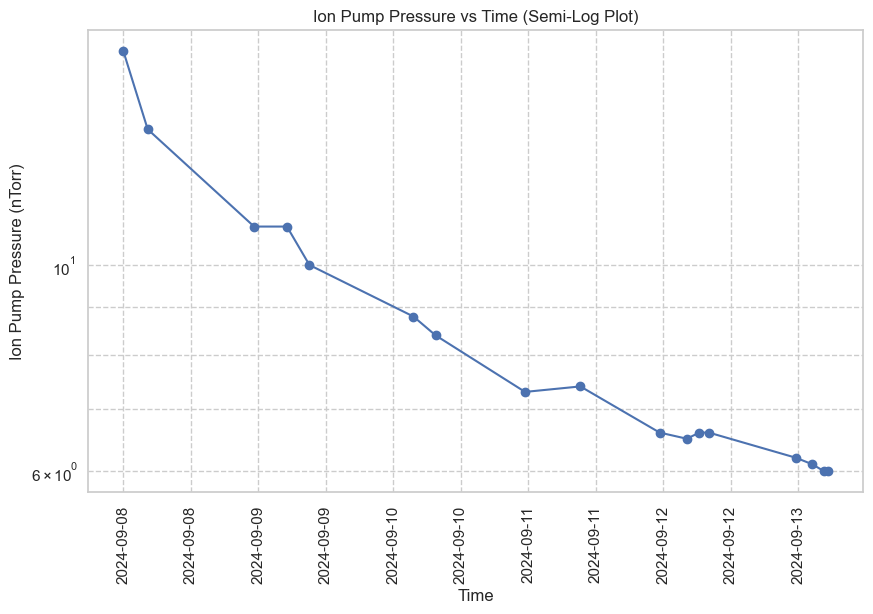

In [12]:





plt.figure(figsize=(10, 6))
plt.semilogy(df['datetime'], df[ion_pump_pressure_col], marker='o')

# Customize the plot
plt.xlabel('Time')
plt.ylabel('Ion Pump Pressure (nTorr)')
plt.title('Ion Pump Pressure vs Time (Semi-Log Plot)')
plt.grid(True, which="both", ls="--")

# Set additional x-ticks at 12-hour intervals
xticks = pd.date_range(start=df['datetime'].min(), end=df['datetime'].max(), freq='12H')
plt.xticks(ticks=xticks, rotation=90)

# Save the plot to a file with tight bounding box
plt.savefig('ion_pump_pressure_semi_log_plot.png', bbox_inches='tight')

# Display the plot
plt.show()